# Data Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
lego_df = pd.read_csv("./lego_sets.csv")
print(f"Data Shape: {lego_df.shape}")
lego_df.head(5)

Data Shape: (12261, 14)


,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [3]:
print(lego_df.columns)

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'prod_desc', 'prod_id', 'prod_long_desc', 'review_difficulty',
       'set_name', 'star_rating', 'theme_name', 'val_star_rating', 'country'],
      dtype='object')


### Dataset description an Info 

In [4]:
lego_df.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,1.226100e+04,10641.000000,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,5.983675e+04,4.514134,4.228960
std,91.980429,36.368984,825.364580,0.652051,1.638115e+05,0.518865,0.660282
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.800000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,2.103400e+04,4.300000,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.206900e+04,4.700000,4.300000
75%,70.192200,13.000000,544.000000,4.800000,7.092200e+04,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000


In [5]:
lego_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
ages                 12261 non-null object
list_price           12261 non-null float64
num_reviews          10641 non-null float64
piece_count          12261 non-null float64
play_star_rating     10486 non-null float64
prod_desc            11884 non-null object
prod_id              12261 non-null float64
prod_long_desc       12261 non-null object
review_difficulty    10206 non-null object
set_name             12261 non-null object
star_rating          10641 non-null float64
theme_name           12258 non-null object
val_star_rating      10466 non-null float64
country              12261 non-null object
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


In [6]:
X = lego_df['piece_count'].values
y = lego_df['list_price'].values

In [7]:
X

array([277., 168.,  74., ..., 233.,  48., 109.])

In [8]:
X = X.reshape(-1,1)
X

array([[277.],
       [168.],
       [ 74.],
       ...,
       [233.],
       [ 48.],
       [109.]])

In [9]:
# X_feature - Amount of pieces in lego set
# y_output - price for the set
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shap {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print('x_test:', x_test)
print('y_test:', y_test)

X_train shape (9808, 1)
y_train shape (9808,)
X_test shap (2453, 1)
y_test shape (2453,)
x_test: [[ 63.]
 [135.]
 [374.]
 ...
 [813.]
 [ 96.]
 [136.]]
y_test: [ 18.2878  24.3878  42.6878 ... 139.152   24.99    15.799 ]


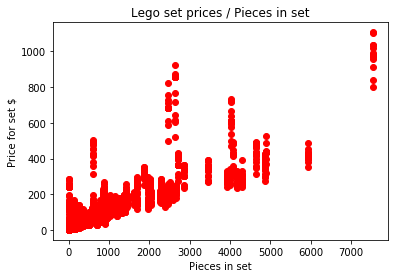

In [10]:
%matplotlib inline
plt.scatter(x_train,y_train,color='red')
plt.xlabel('Pieces in set')
plt.ylabel('Price for set $')
plt.title('Lego set prices / Pieces in set')
plt.show()

In [11]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 76.6 %
Test accuracy 71.75 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

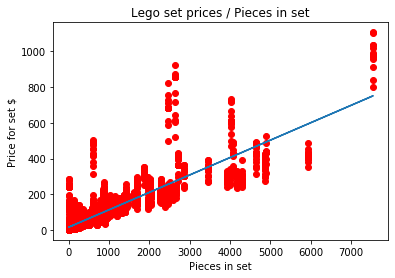

In [12]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel('Pieces in set')
plt.ylabel('Price for set $')
plt.title('Lego set prices / Pieces in set')
plt.plot

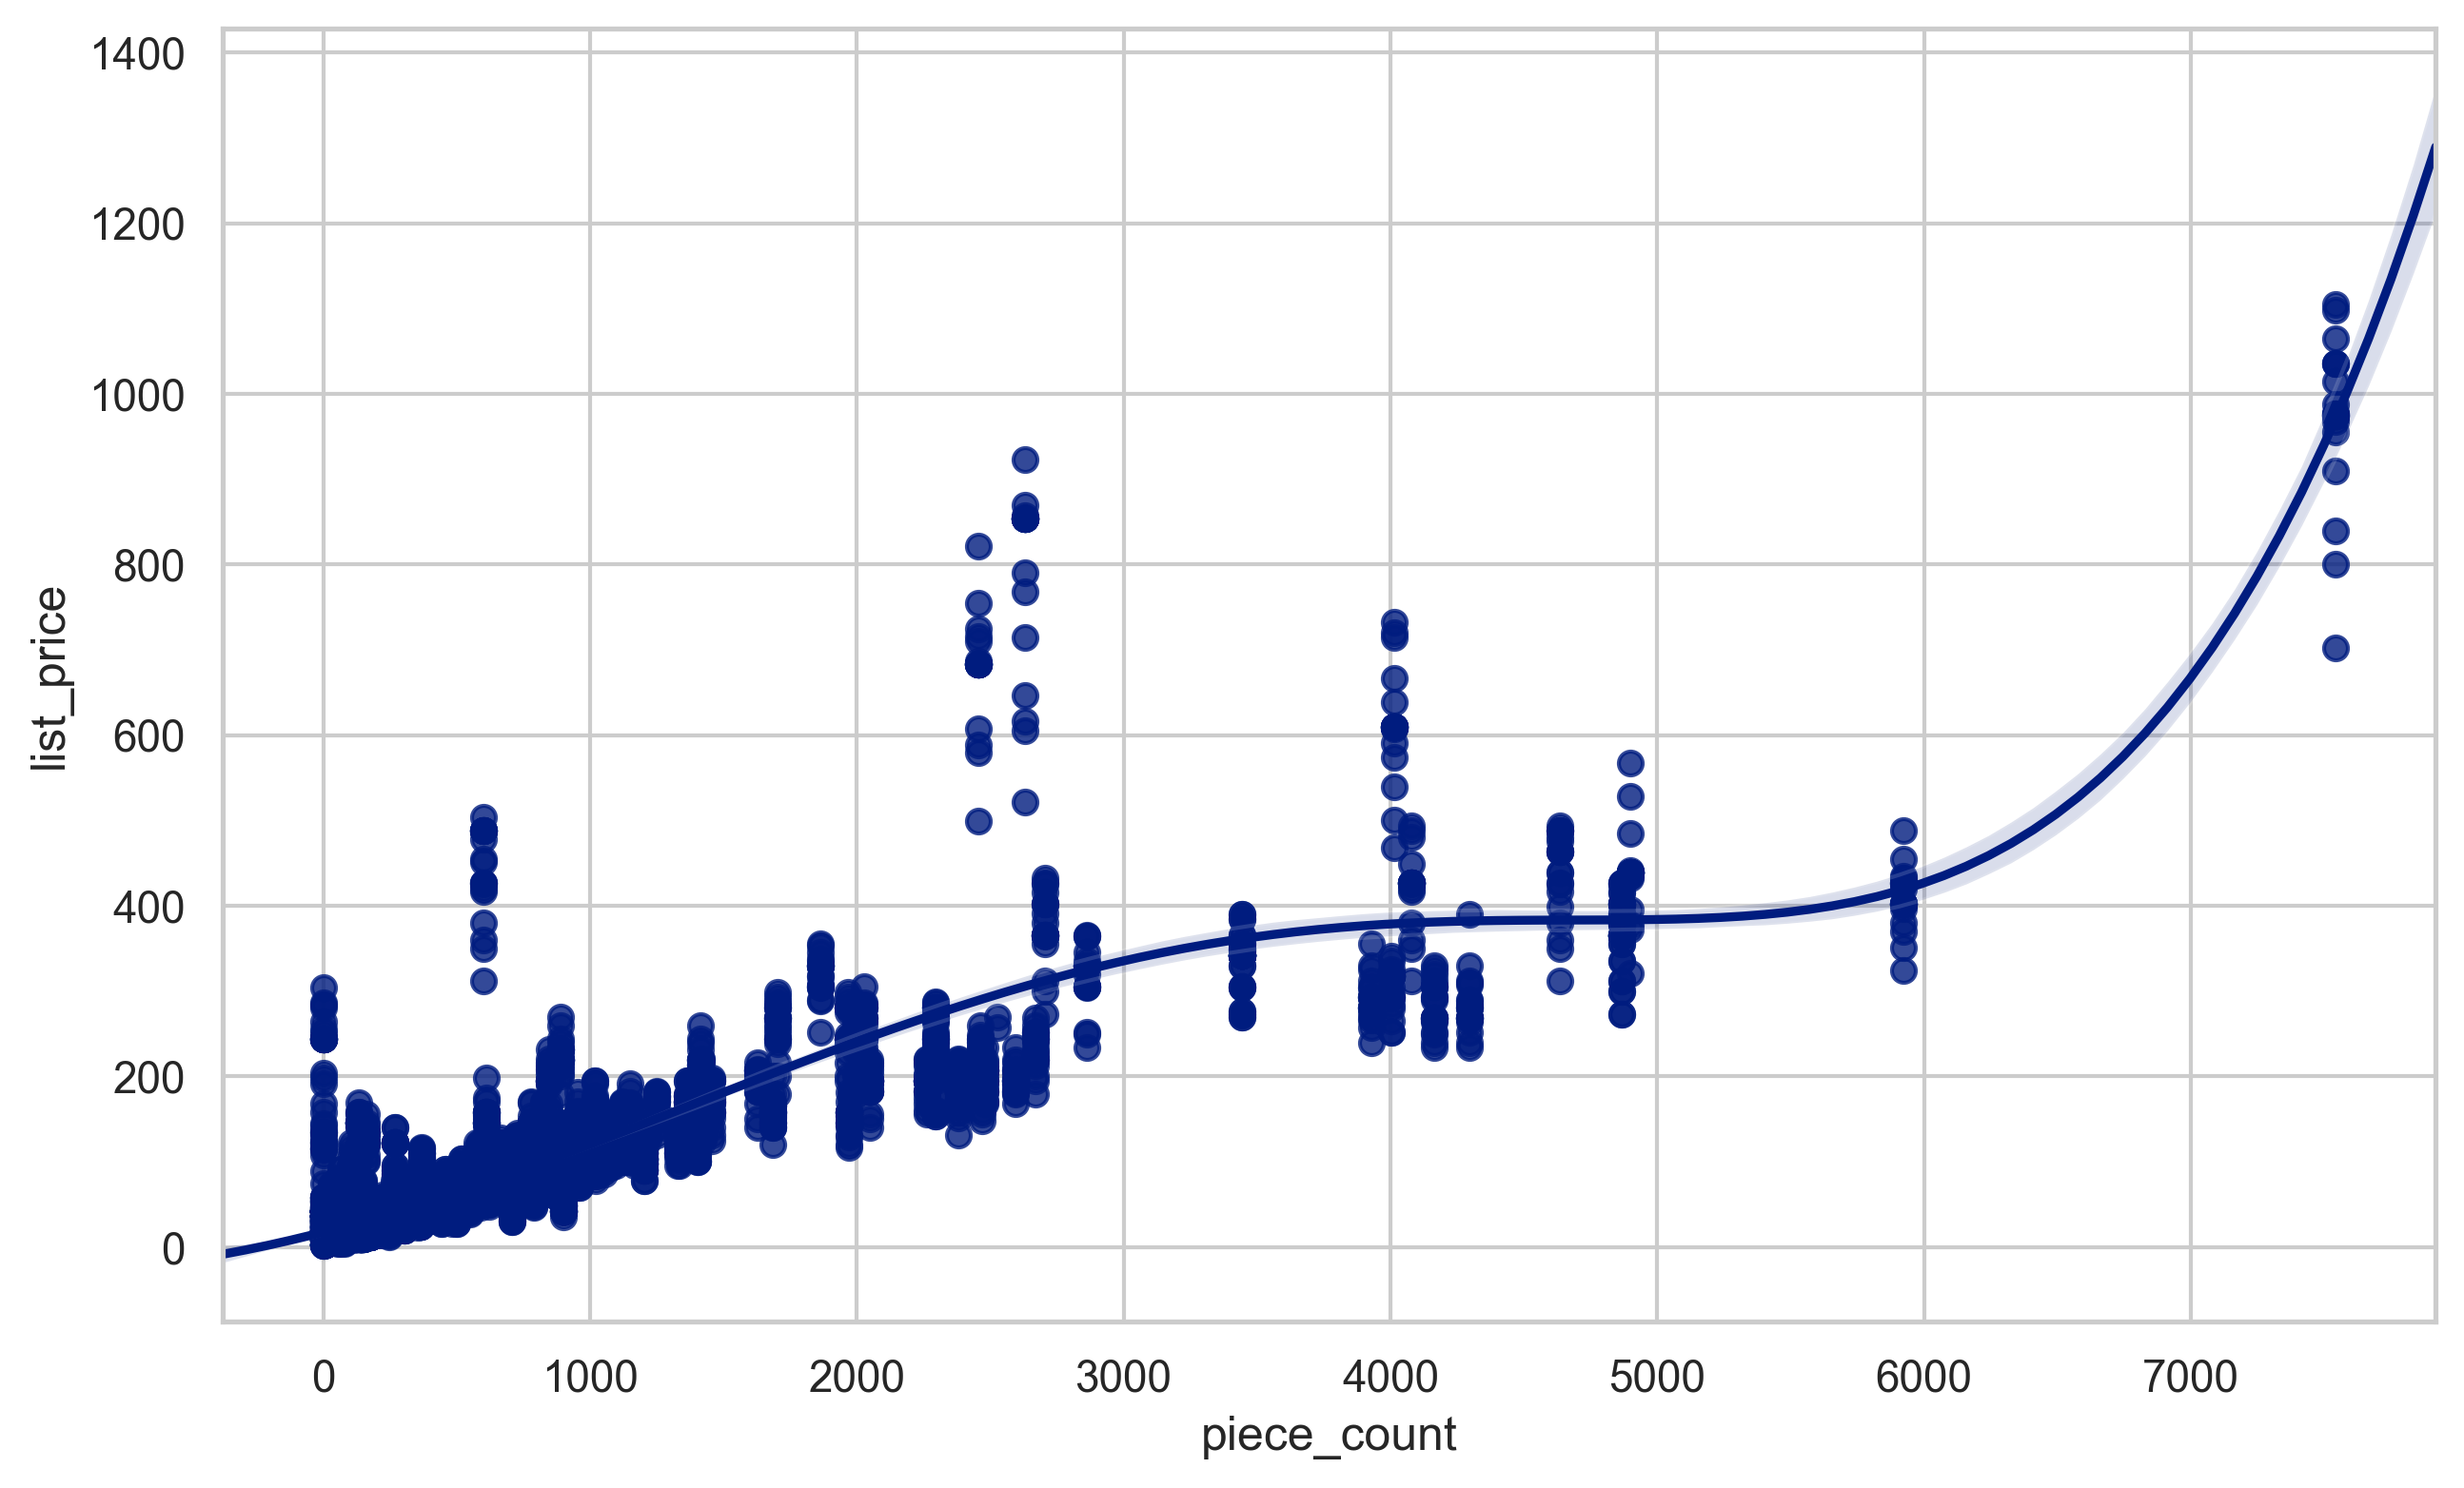

In [15]:
# create scatter plot
import seaborn as sns

sns.set(style = 'whitegrid', palette="dark")
plt.figure(figsize=(10,6),dpi=300)
sns.regplot(x='piece_count', y='list_price', data=lego_df, order=5)

### Dependance list_price from the star_rating

<Figure size 6000x3600 with 0 Axes>

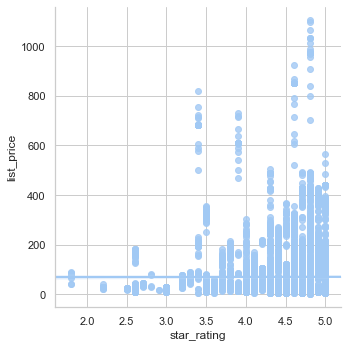

In [86]:
sns.set(style = 'whitegrid', palette="pastel")
plt.figure(figsize=(10,6),dpi=600)
sns.lmplot(x='star_rating', y='list_price', data=lego_df, order=1)
plt.show()

### Dependance list_price from the Amount of reviews

In [85]:
lego_df2 = lego_df.dropna() #get rid of the None values
X1 = lego_df2['list_price'].values
y1 = lego_df2['num_reviews'].values
X1 = X1.reshape(-1,1)

In [71]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,y1,train_size=0.8,test_size=0.2,random_state=100)


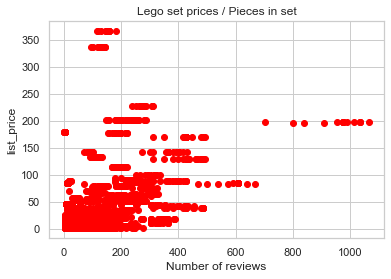

In [72]:
%matplotlib inline
plt.scatter(x1_train,y1_train,color='red')
plt.xlabel('Number of reviews')
plt.ylabel('list_price')
plt.title('Lego set prices / Pieces in set')
plt.show()

In [73]:
lm = LinearRegression()
lm.fit(x1_train, y1_train)
y1_predict = lm.predict(x1_test)
print(f"Train accuracy {round(lm.score(x1_train,y1_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x1_test,y1_test)*100,2)} %")

Train accuracy 28.0 %
Test accuracy 25.66 %


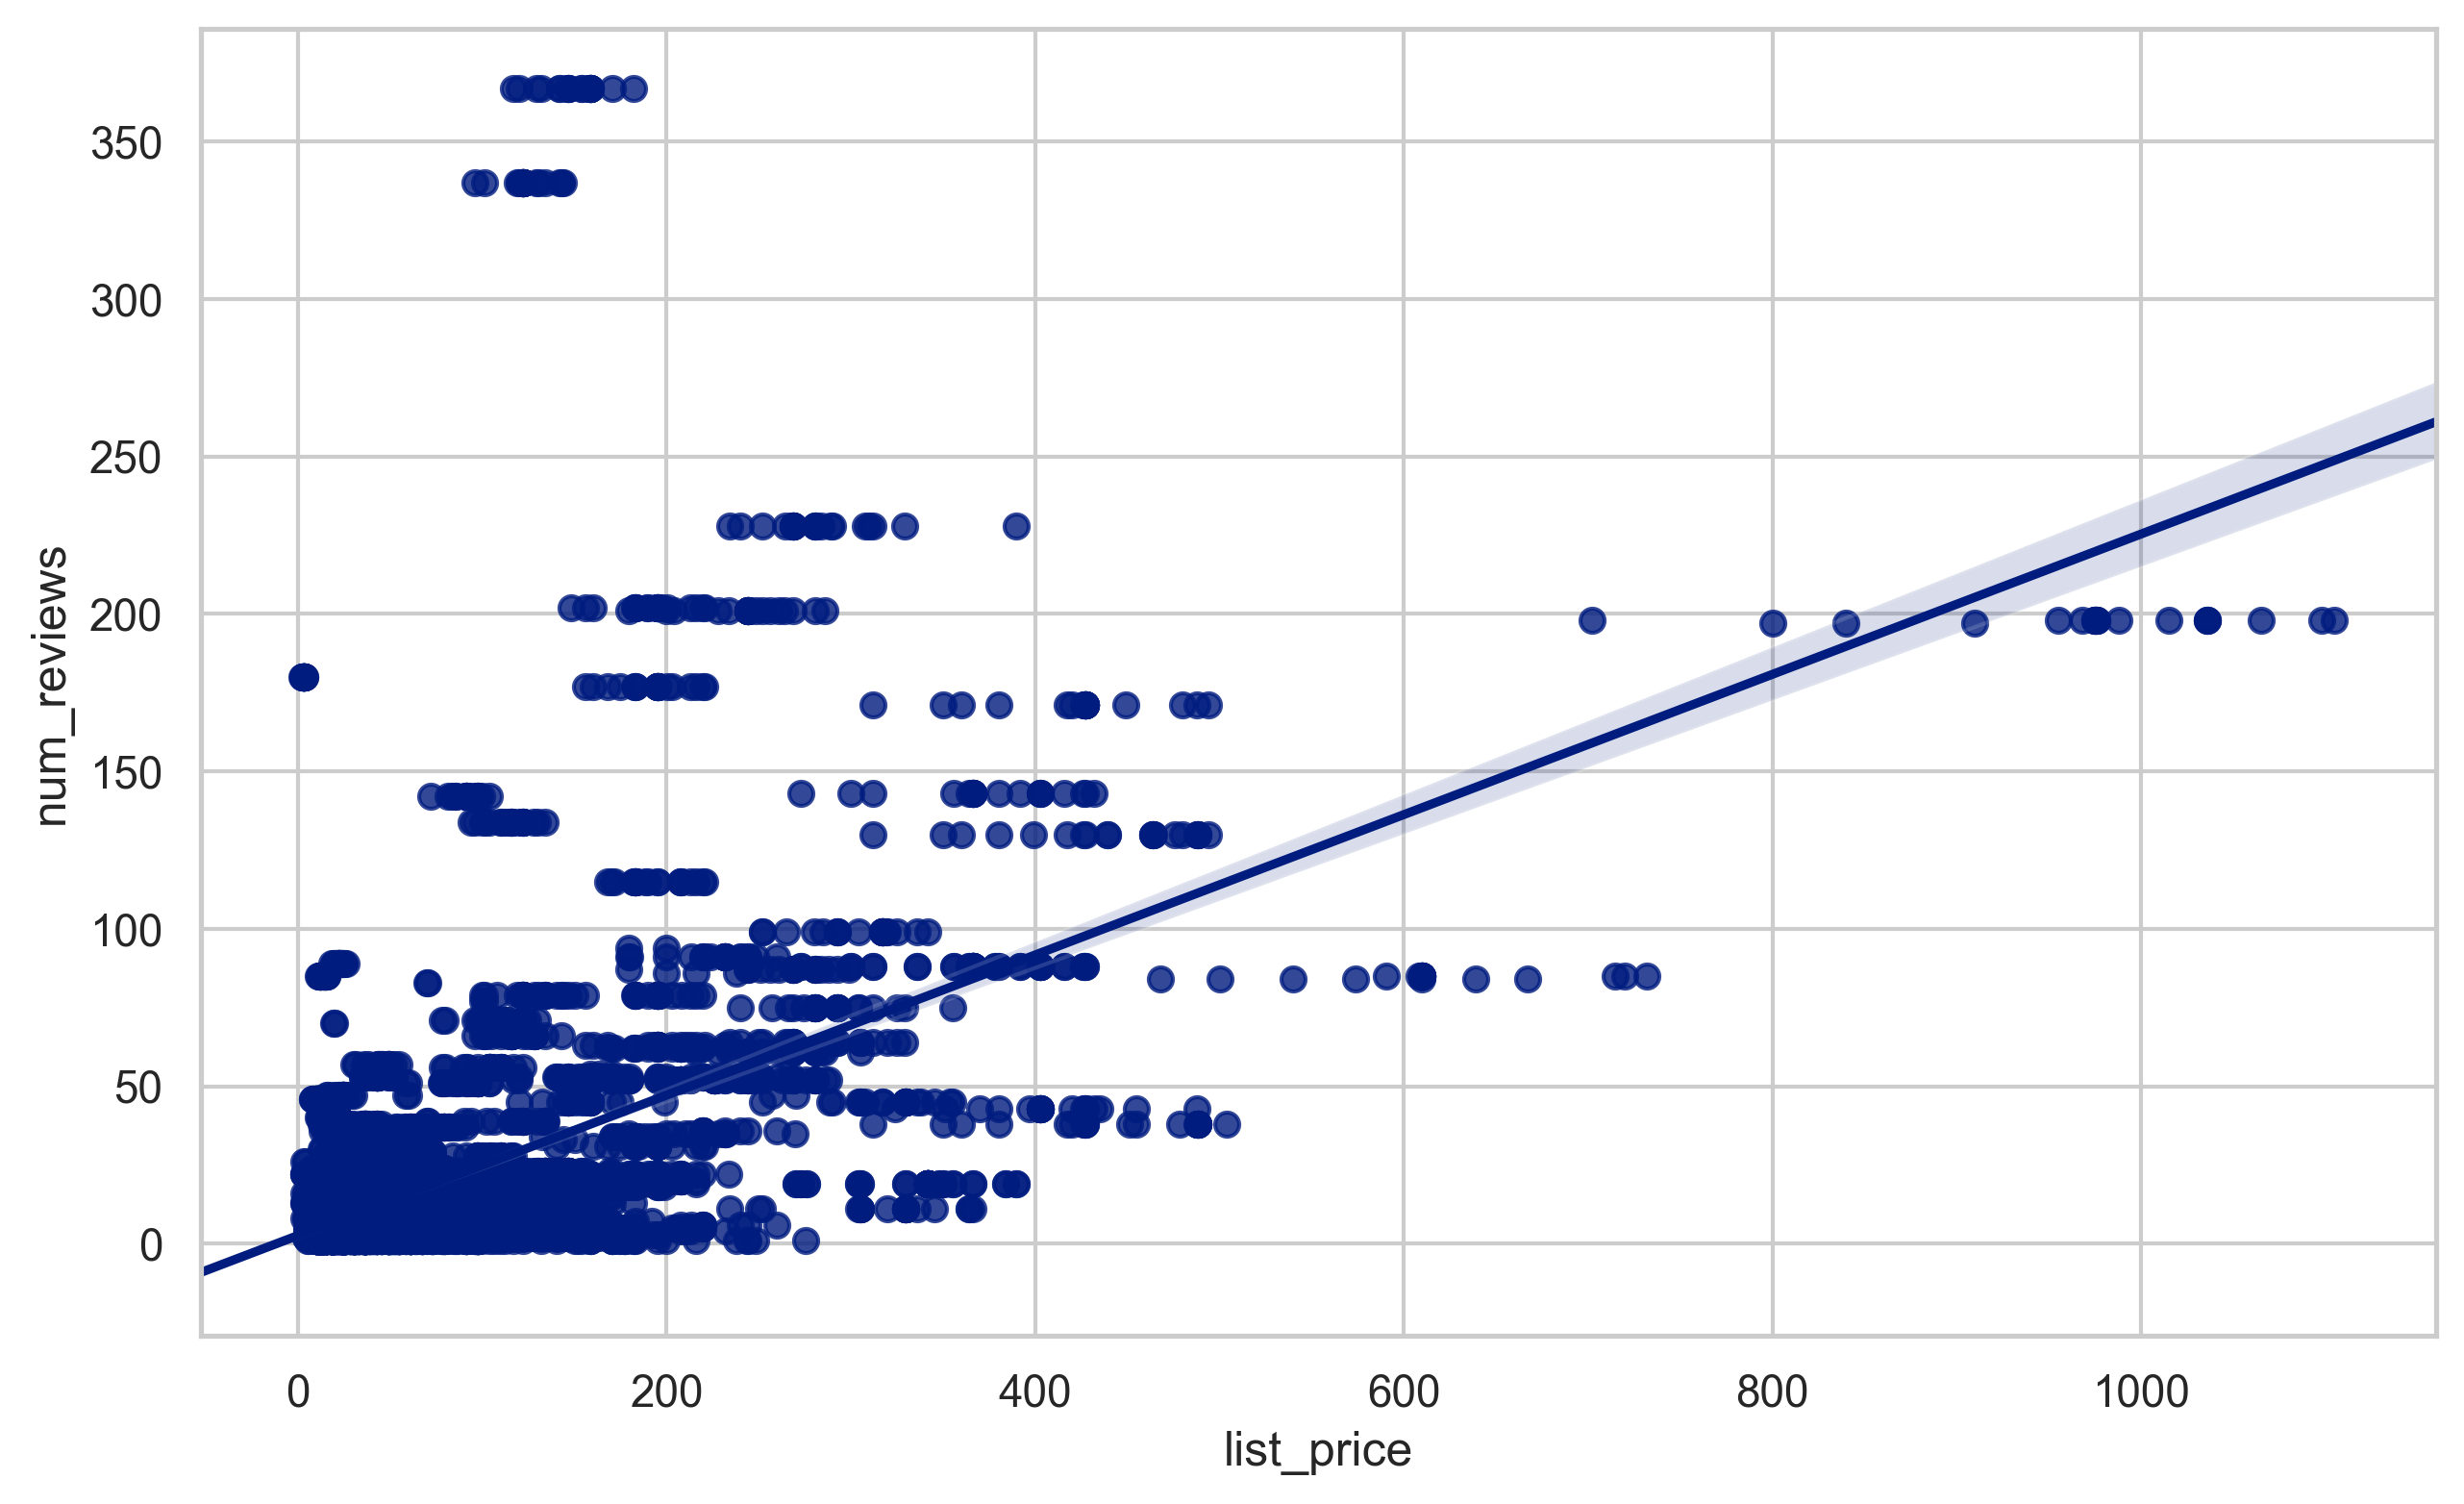

In [74]:
import seaborn as sns

sns.set(style = 'whitegrid', palette="dark")
plt.figure(figsize=(10,6),dpi=300)
sns.regplot(x='list_price', y='num_reviews', data=lego_df2, order=1)

In [ ]:
# Create a list of unique theme names

In [89]:
unique_themes = lego_df["theme_name"].unique()

In [106]:
unique_themes

array(['Angry Birds™', 'Architecture', 'BOOST', 'BrickHeadz', 'City',
       'Juniors', 'Classic', 'Creator 3-in-1', 'Creator Expert',
       'THE LEGO® BATMAN MOVIE', 'DC Comics™ Super Heroes', 'DIMENSIONS™',
       'DC Super Hero Girls', 'Disney™', 'DUPLO®', 'Elves', 'Friends',
       'Ghostbusters™', 'Ideas', 'Indoraptor Rampage at Lockwood Estate',
       'Carnotaurus Gyrosphere Escape', 'T. rex Transport',
       'Jurassic Park Velociraptor Chase', 'Dilophosaurus Outpost Attack',
       "Blue's Helicopter Pursuit", 'Stygimoloch Breakout',
       'Pteranodon Chase', 'Marvel Super Heroes', 'MINDSTORMS®',
       'Minecraft™', 'Minifigures', 'NEXO KNIGHTS™',
       'THE LEGO® NINJAGO® MOVIE™', 'NINJAGO®', 'SERIOUS PLAY®',
       'Speed Champions', 'Star Wars™', 'Technic', 'Power Functions',
       'LEGO® Creator 3-in-1', nan], dtype=object)

In [119]:
# populate my_data array with theme names, mean of price for each Theme name, and price_deviation for each nane
my_data = []
for el in unique_themes:
    new_col = []
    new_col.append(el)
    new_col.append(np.mean(lego_df.loc[lego_df['theme_name'] == el]['list_price']))
    new_col.append(np.std(lego_df.loc[lego_df['theme_name'] == el]['list_price']))
    my_data.append(new_col)

In [ ]:
# Create new dataset

In [122]:
my_df = pd.DataFrame(my_data, columns = ['unique_themes', 'price_mean', 'price_deviation']) 

In [125]:
my_df_ordered = my_df.nlargest(47, 'price_mean')

,unique_themes,price_mean,price_deviation
34,SERIOUS PLAY®,485.414252,299.150797
17,Ghostbusters™,405.397161,117.348414
8,Creator Expert,206.729293,85.537071
2,BOOST,196.572316,18.764210
19,Indoraptor Rampage at Lockwood Estate,166.283314,18.766946
37,Technic,104.887717,100.596116
20,Carnotaurus Gyrosphere Escape,101.946076,11.397875
18,Ideas,94.231475,57.922875
36,Star Wars™,91.500329,142.389924
21,T. rex Transport,90.684171,9.856404


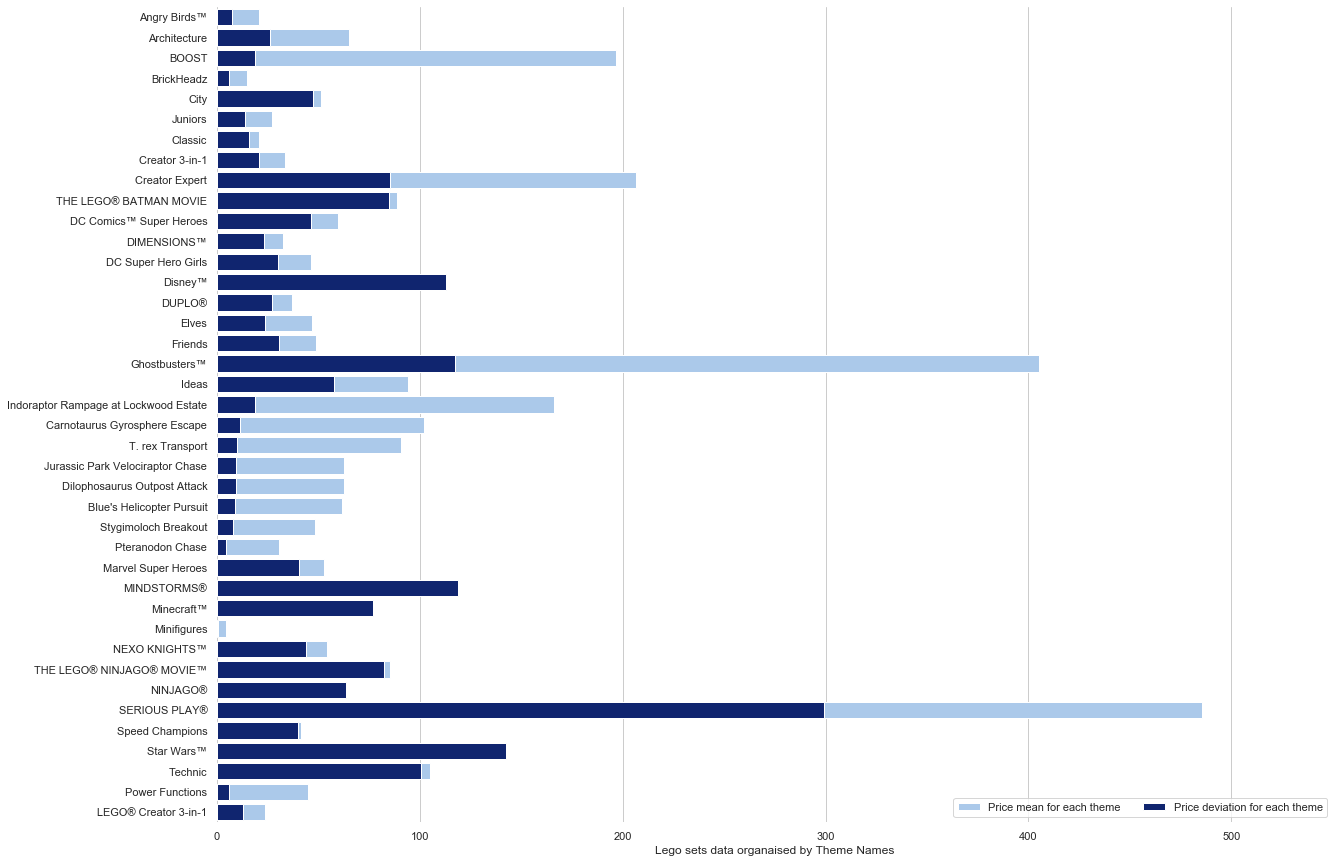

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Plot the price_mean
sns.set_color_codes("pastel")
sns.barplot(x="price_mean", y="unique_themes", data = my_df,
            label="Price mean for each theme", color="b")

# Plot the price_deviation
sns.set_color_codes("dark")
sns.barplot(x="price_deviation", y="unique_themes", data=my_df,
            label="Price deviation for each theme", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,550), ylabel="",
       xlabel="Lego sets data organaised by Theme Names")
sns.despine(left=True, bottom=True)

## Conclusions

Based on the graphs above I can tell that there are some corellation between the amount of pieces in lego set and it's price, but most likely there are other factors that affect the price. I've checked how price are changing based on the number of reviews and star rating. There is no strong dependability of the price from this factors. 
I also groupped all data by themes name and created a dataset which displays a mean_price and deviation_price for each of the theme. Based on this I can tell that price get affected by the theme names, but based on the deviation rates for some elements I can tell that to make more deep analysis we will need to check the amounts of elements in each Theme set.